# Video 1: First Model

In [34]:
import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset
superconductivty_data = fetch_ucirepo(id=464)

# data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets

df = X.join(y)

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [35]:
df.shape

(21263, 82)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9189255520637329

# Video 2: Tuning Model

In [8]:
model = RandomForestRegressor(max_depth=24, n_estimators=75, max_features=0.75, min_samples_leaf=4, max_samples=0.8)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9175696821688872

# Video 4: Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(max_depth=24, n_estimators=75, max_features=0.75, min_samples_leaf=4)
cross_val_score(model, X, y)

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

array([0.71579458, 0.69897716, 0.87872829, 0.79482055, 0.65107764])

In [12]:
model = RandomForestRegressor(
    max_depth=24,
    n_estimators=50,
    max_features=0.75,
    min_samples_leaf=5
    )
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
RMSE = (-scores)**0.5
print(RMSE)
print(RMSE.mean())

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[16.53968529 16.75604261 10.38540335  5.04985819 13.72857682]
12.49191325049653


In [13]:
y.describe()

,critical_temp
count,21263.000000
mean,34.421219
std,34.254362
min,0.000210
25%,5.365000
50%,20.000000
75%,63.000000
max,185.000000


In [18]:
model = RandomForestRegressor(
    max_depth=24,
    n_estimators=50,
    max_features=0.75,
    min_samples_leaf=5
    )
model.fit(X_train, y_train)
model.predict(X_test.head())

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ 76.57369982,  72.443436  ,   9.1011833 ,  29.62728155,
       105.73277377])

In [17]:
y_test.head()

,critical_temp
19619,85.0
1103,85.5
18554,11.6
7843,16.0
3972,107.0


# Video 6: Eliminate Outliers

In [20]:
y.value_counts().tail(100)

critical_temp
0.0763           1
0.0770           1
110.8500         1
110.9000         1
0.0641           1
                ..
133.9000         1
134.2000         1
134.7000         1
135.4000         1
135.5000         1
Name: count, Length: 100, dtype: int64

In [30]:
df['critical_temp'].value_counts().shape

(2869,)

<Axes: >

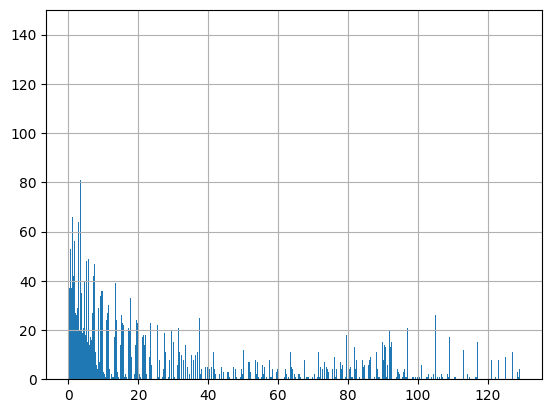

In [31]:
df['critical_temp'].hist(bins = 2869)

In [36]:
df = df[(df['critical_temp']>0.1) & (df['critical_temp']<130)]
df['critical_temp'].value_counts().tail()

critical_temp
0.703    1
4.010    1
0.655    1
3.145    1
3.256    1
Name: count, dtype: int64

In [37]:
df.shape

(20972, 82)

In [38]:
model = RandomForestRegressor(
    max_depth=24,
    n_estimators=50,
    max_features=0.75,
    min_samples_leaf=5
    )
model.fit(X_train, y_train)
model.predict(X_test.head())

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ 77.71789346,  73.45177771,   8.62023428,  31.53309979,
       104.41705794])

In [39]:
y_test.head()

,critical_temp
19619,85.0
1103,85.5
18554,11.6
7843,16.0
3972,107.0


In [40]:
model.score(X_test.head(), y_test.head())

0.94134577067703

Random Forests seem to be a very good model for my dataset. I was getting very high scores with a single data split, and pretty high scores with cross validation, which I assume is more accurate. I only used cross validation a few times because it took a really long time to run with this model (almost 5 minutes sometimes!)